<a href="https://colab.research.google.com/github/suchitra2020180/RS_GIS_Python/blob/main/Colab_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab is a hosted Jupyter notebook environment that allows anyone to run Python code via a web-browser. It provides you free computation and data storage that can be utilized by your Python code.

You can click the +Code button to create a new cell and enter a block of code. To run the code, click the Run Code button next to the cell, or press Shirt+Enter key.

# Package Management: To list and import preinstalled packages

In [ ]:
!pip list -v

Package                            Version             Location                                Installer
---------------------------------- ------------------- --------------------------------------- ---------
absl-py                            1.4.0               /usr/local/lib/python3.10/dist-packages uv
accelerate                         0.34.2              /usr/local/lib/python3.10/dist-packages uv
aiohappyeyeballs                   2.4.3               /usr/local/lib/python3.10/dist-packages uv
aiohttp                            3.10.10             /usr/local/lib/python3.10/dist-packages uv
aiosignal                          1.3.1               /usr/local/lib/python3.10/dist-packages uv
alabaster                          0.7.16              /usr/local/lib/python3.10/dist-packages uv
albucore                           0.0.16              /usr/local/lib/python3.10/dist-packages uv
albumentations                     1.4.15              /usr/local/lib/python3.10/dist-packages uv
altair

In [ ]:
#To import pre-installed python packages in colab
import pandas as pd
import geopandas as gpd


#To install third party packages

In [ ]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.4 MB/s eta 0:00:00


In [ ]:
import rioxarray

#Data Management

Colab provides 100GB of disk space along with your notebook. This can be used to store your data, intermediate outputs and results.

The code below will create 2 folders named 'data' and 'output' in your local filesystem.

In [20]:
#Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
main_path="/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python"
data_folder="data"
output_folder="output"

data_folder_path=os.path.join(main_path,data_folder)
output_folder_path=os.path.join(main_path,output_folder)

if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)

if not os.path.exists(output_folder_path):
  os.mkdir(output_folder_path)

Downloading data through internet and store it in the Colab environment and in google drive. Here is a helper function to download a file from a URL.

In [ ]:
import requests

def download(url):
  filename=os.path.join(data_folder_path,os.path.basename(url))   #Downloaded data will be saved in data folder in drive
  if not os.path.exists(filename):
    with requests.get(url,stream=True,allow_redirects=True) as r:
      with open(filename,'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
          f.write(chunk)
    print('Downloaded', filename)

Lets download "Populated Places" data from Natural Earth (https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

In [ ]:
#download('http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places.zip')
download("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places.zip")

In [ ]:
download("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places_simple.zip")

Downloaded /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_10m_populated_places_simple.zip


In [ ]:
#download('http//www.naturalearthdata.com/download/10m/cultural/'+'ne_10m_populated_places.zip')

First extract data from zip file

In [ ]:
#Trail1
import zipfile
zip_file='ne_10m_populated_places_simple.zip'
zip_file_path=os.path.join(data_folder_path,zip_file)
print('Zip file path:',zip_file_path)
file="ne_10m_populated_places"
extract_to_path=os.path.join(data_folder_path,file)
#data_extracted=os.path.join(data_folder_path,os.path.basename(url)+'extracted')
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print('Files extracted to:', extract_to_path)

Zip file path: /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_10m_populated_places_simple.zip


BadZipFile: File is not a zip file

In [1]:
#Trail2:
from zipfile import ZipFile
test_folder='test'
extract_to_path=os.path.join(data_folder_path,test_folder)
if not os.path.exists(extract_to_path):
  os.mkdir(extract_to_path)
with ZipFile('/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_110m_populated_places.zip') as zipObj:
  zipObj.extractall(extract_to_path)

#Youtube

In [ ]:
import zipfile
zip_file='ne_10m_populated_places_simple.zip'
zip_file_path=os.path.join(data_folder_path,zip_file)
#places=gpd.read_file(zip_file_path)
places=gpd.read_file(f"zip:{zip_file_path}")


#Trail2:


DataSourceError: '/vsizip//content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_10m_populated_places_simple.zip' does not exist in the file system, and is not recognized as a supported dataset name.

Lets read the file using geopandas

In [ ]:
file='ne_110m_populated_places.zip'
filepath=os.path.join(data_folder_path,file)
print('Filepath:',filepath)
places=gpd.read_file(filepath)

#data = gpd.read_file(f"zip://{filepath}")
places.head()

In [ ]:
capitals=places[places['adm0cap']==1]
capitals

NameError: name 'places' is not defined

Saving the result as a geopackage file

In [ ]:
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(driver='GPKG', filename=output_path)

Open it in QGIS

Matplotlib Basics

In [2]:
import os
import matplotlib.pyplot as plt

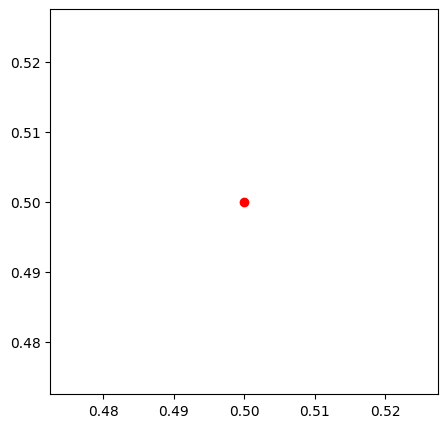

In [5]:
#Displaying a single point on figure
point=(0.5,0.5)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point[0],point[1],'ro')
plt.show()

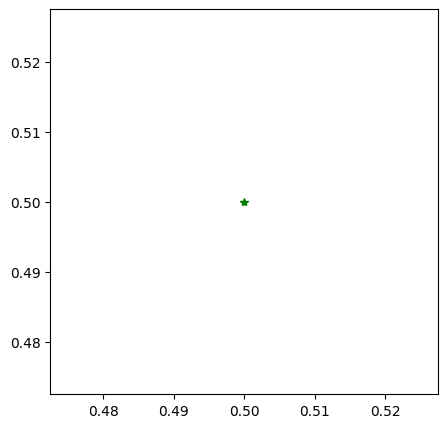

In [9]:
#Displaying a single point on figure
point=(0.5,0.5)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point[0],point[1],color='green',marker='*')
plt.show()

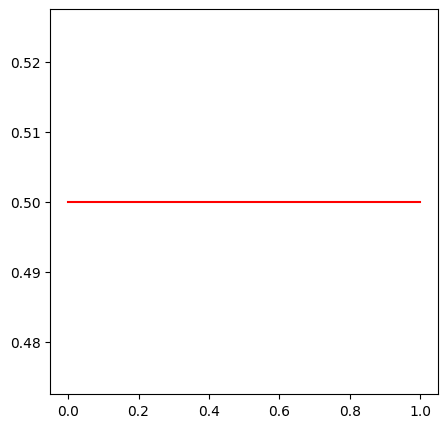

In [7]:
#Displaying a single point on figure
point=(0.5,0.5)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point,'r')  #Here When you pass a tuple directly as a single argument like ax.plot(point, 'red'), it treats the tuple as a sequence of y values, implicitly assuming the x values to be [0, 1], resulting in a line plot.
plt.show()

Note: Understanding *args and **kwargs

Python functions accept 2 types of arguments.

Non Keyword Arguments: These are referred as *args. When the number of arguments that a function takes is not fixed, it is specified as *args. In the function plot() above, you can specify 1 argument, 2 arguments or even 6 arguments and the function will respond accordingly.
Keyword Arguments: These are referred as **kwargs. These are specified as key=value pairs and usually used to specify optional parameters. These should always be specified after the non-keyword arguments. The color='green' in the plot() function is a keyboard argument.

One problematic area for plotting geospatial data using matplotlib is that geospatial data is typically represented as a list of x and y coordinates. Let's say we want to plot the following 3 points defined as a list of (x,y) tuples.

In [ ]:
locations=[(0.1,0.2),(0.5,0.7),(0.9,0.8)]

But to plot it, matplotlib require 2 separate lists or x and y coordinates. Here we can use the zip() function to create list of x and y coordinates.

X values: (0.1, 0.5, 0.9)
Y values: (0.2, 0.7, 0.8)


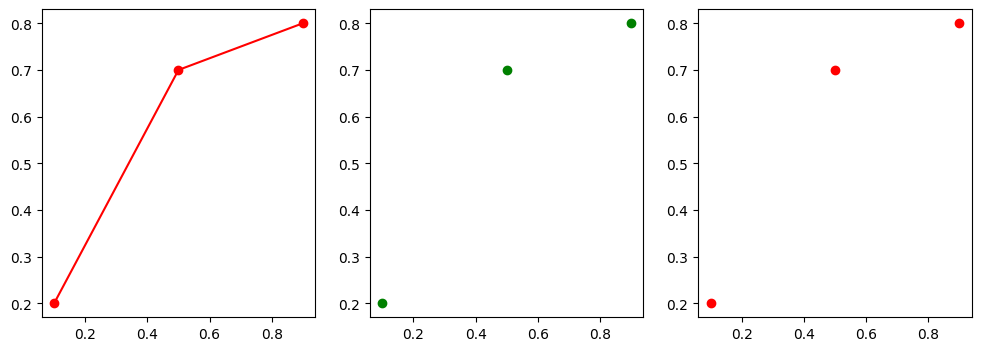

In [19]:
locations=[(0.1,0.2),(0.5,0.7),(0.9,0.8)]

# Separate the x and y coordinates
x_values, y_values=zip(*locations)
print('X values:',x_values)
print('Y values:',y_values)

#Displaying the same figure in 2 subplots
fig,ax=plt.subplots(1,3)
fig.set_size_inches(12,4)
ax[0].plot(x_values, y_values,color='red',marker='o')
ax[1].plot(x_values, y_values,'go')
ax[2].plot(x_values, y_values, color='red',marker='o', linestyle='None')
plt.show()

Saving the figure using plt.savefig() method. Remember to save the figure before calling plt.show() otherwise the figure would be empty.

X values: (0.1, 0.5, 0.9)
Y values: (0.2, 0.7, 0.8)


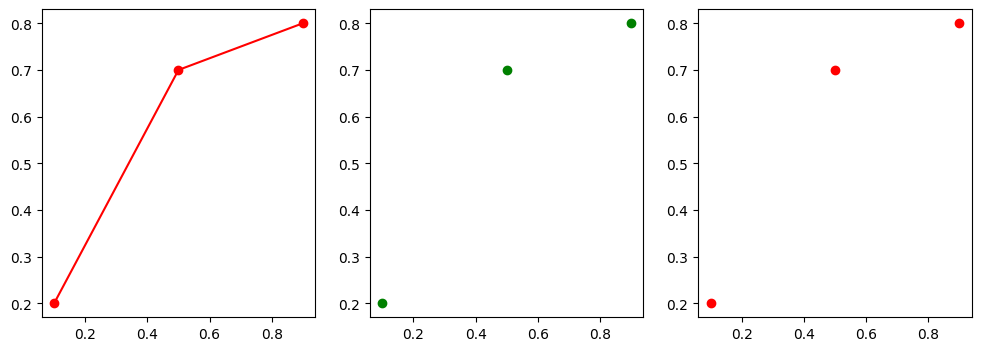

In [22]:
locations=[(0.1,0.2),(0.5,0.7),(0.9,0.8)]

# Separate the x and y coordinates
x_values, y_values=zip(*locations)
print('X values:',x_values)
print('Y values:',y_values)

#Displaying the same figure in 2 subplots
fig,ax=plt.subplots(1,3)
fig.set_size_inches(12,4)
ax[0].plot(x_values, y_values,color='red',marker='o')
ax[1].plot(x_values, y_values,'go')
ax[2].plot(x_values, y_values, color='red',marker='o', linestyle='None')
#For saving the output figure
output_path='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/output'
output_file='locations.png'
output_file_path=os.path.join(output_path,output_file)
plt.savefig(output_file_path)
plt.show()